In [0]:
# pip install opencv-python==3.2.0.6
# pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

In [2]:
import cv2
cv2.__version__

'4.1.2'

In [0]:
#import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [0]:
import pandas as pd
df = pd.DataFrame(columns=['Fingerprint','InputFrameid','Path_InFrameId','TestFrameId','Path_TestFrameId','Result','ResultPath'])
len(df)
Fingerprint='3-2'

In [0]:
# listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Assembled Images/')
# listofAssmblImages
# print(listofAssmblImages)

# AssembledCoilPath='/content/drive/My Drive/Lennox/Cropped Assembled Images/'

In [0]:
# listofCropImages=os.listdir('/content/drive/My Drive/Lennox/Cropped Images/')
# print(listofCropImages)
# CoilFilePath='/content/drive/My Drive/Lennox/Cropped Images/'

In [0]:
# for coilfile in listofCropImages:
#   img1 = cv2.imread(CoilFilePath+ coilfile,0) # trainImage
#   print(coilfile)
#   # cv2_imshow(img1)
#   getDescriptorForFp1(listofAssmblImages,img1,AssembledCoilPath)
# inImgPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/153_crop_not_75_manual_brazing.jpg'
# inImgPath.split(".")[0].split("/")[-1]

In [0]:
def getDescriptorForFp1(inImgPath,listofTestImages,testPath,resultPath):

  img1 = cv2.imread(inImgPath,0) # trainImage
  # cv2_imshow(img1)
  
  for tstimage in listofTestImages:

    img2 = cv2.imread(testPath + tstimage,0) # trainImage
    
    print("Read Files",testPath + tstimage)

    # cv2_imshow(img2)

    MIN_MATCH_COUNT = 10

    #Create ORB Object and BF Object (using Hamming)

    #orb = cv2.ORB_create()
    orb = cv2.ORB_create(nfeatures=2500)

    print("Created orb descriptor")

    #Find Keypoints and Descriptors

    kpts1, descs1 = orb.detectAndCompute(img1, None)

    kpts2, descs2 = orb.detectAndCompute(img2, None)

    print ("Found Keypoints & Descriptors")

    #match descriptors and sort them in order of their distance

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    matches = bf.knnMatch(descs1, trainDescriptors = descs2, k=2)
    good = []

    good_without_list = []

    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            good_without_list.append(m)
    print('Length of Good List',len(good),'MIN_MATCH_COUNT',MIN_MATCH_COUNT) 
    if len(good) > MIN_MATCH_COUNT:

        src_pts = np.float32([kpts1[m.queryIdx].pt for m in good_without_list]).reshape(-1,1,2)
        dst_pts = np.float32([kpts2[m.trainIdx].pt for m in good_without_list]).reshape(-1,1,2)
      
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
      
        h,w = img1.shape[:2]
        pts = np.float32([[0,0], [0,h-1], [w-1, h-1], [w-1,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
      
        img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255),1 , cv2.LINE_AA)
        print ("The Same One!!")
    else:
        print ("Not Enough matches are found - %d%d" % (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

    img3 = cv2.drawMatches(img1,kpts1,img2,kpts2,good_without_list,None,**draw_params)

    plt.imshow(img3, 'gray'),plt.show()
    
    # '/content/drive/My Drive/Lennox/Results_fp2/NoMatch'
    print(resultPath+inImgPath.split(".")[0].split("/")[-1]+'-'+tstimage.split(".")[0])
    if(matchesMask != None):
      print('Matches Found')
      if not os.path.exists(resultPath+'Match'):
        os.makedirs(resultPath+'Match')
      ResultFinal=resultPath+'Match/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'match'+tstimage.split(".")[0]+'.jpg'
      cv2.imwrite(ResultFinal,img3)
      print(os.listdir(resultPath+'Match/'))
      # ['Fingerprint','InputFrameid','Path_InFrameId','TestFrameId','Path_TestFrameId','Result','ResultPath'])
      df.loc[len(df)]=[Fingerprint,inImgPath.split(".")[0].split("/")[-1],inImgPath.split("Lennox/")[1],tstimage.split(".")[0],testPath.split("Lennox/")[1]+tstimage,'Match',ResultFinal.split("Lennox/")[1]] 
    # if(matchesMask != None):
    #   print('Matches Found')
    #   if not os.path.exists(resultPath+'Match'):
    #     os.makedirs(resultPath+'Match')
    #   cv2.imwrite(resultPath+'Match/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'match'+tstimage.split(".")[0]+'.jpg',img3)
    #   print(os.listdir(resultPath+'Match/'))
    else:
      print('No Matches Found')
      if not os.path.exists(resultPath+'NoMatch'):
        os.makedirs(resultPath+'NoMatch')
      cv2.imwrite(resultPath+'NoMatch/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'Nomatch'+tstimage.split(".")[0]+'.jpg',img3) 


In [9]:
# listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/')
listofAssmblImages=os.listdir('/content/drive/My Drive/Lennox/Phase2/crop/')
print(listofAssmblImages)
# AssembledCoilPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/'
AssembledCoilPath='/content/drive/My Drive/Lennox/Phase2/crop/'

['frame119_0_ph2.jpg', 'frame355_0_ph2.jpg', 'frame2302_0_ph2.jpg', 'frame4249_0_ph2.jpg', 'frame237_0_ph2.jpg', 'frame2125_0_ph2.jpg', 'frame3895_0_ph2.jpg', 'frame9677_0_ph2.jpg', 'frame11742_0_ph2.jpg', 'frame11801_0_ph2.jpg', 'frame13512_0_ph2.jpg', 'frame14161_0_ph2.jpg', 'frame15341_0_ph2.jpg', 'frame16049_0_ph2.jpg', 'frame18822_0_ph2.jpg', 'frame20002_0_ph2.jpg', 'frame21064_0_ph2.jpg', 'frame21418_0_ph2.jpg', 'frame23955_0_ph2.jpg', 'frame26551_0_ph2.jpg', 'frame26905_0_ph2.jpg']


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# listofCropImages=os.listdir('/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/')
listofCropImages=os.listdir('/content/drive/My Drive/Lennox/Phase3/crop/')
print(listofCropImages)
# CoilFilePath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/ManualBrazing/'
CoilFilePath='/content/drive/My Drive/Lennox/Phase3/crop/'

['frame532_0_ph3.jpg', 'frame945_0_ph3.jpg', 'frame2715_0_ph3.jpg', 'frame2833_0_ph3.jpg', 'frame3836_0_ph3.jpg', 'frame3836_1_ph3.jpg', 'frame4013_0_ph3.jpg', 'frame3128_0_ph3.jpg', 'frame4308_0_ph3.jpg', 'frame4308_1_ph3.jpg', 'frame4249_0_ph3.jpg', 'frame4249_1_ph3.jpg', 'frame4367_0_ph3.jpg', 'frame4367_1_ph3.jpg']


In [0]:
resultPath='/content/drive/My Drive/Lennox/Results_fp3/'

In [13]:
##getDescriptorForFp1(inImgPath,listofTestImages,testPath,resultPath)
for coilfile in listofCropImages:

  print(CoilFilePath+coilfile)
  InputPath=CoilFilePath+coilfile
  getDescriptorForFp1(InputPath,listofAssmblImages,AssembledCoilPath,resultPath)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
df.head(5).T

,0,1,2,3,4
Fingerprint,3-2,3-2,3-2,3-2,3-2
InputFrameid,frame4308_0_ph3,frame4308_0_ph3,frame4249_1_ph3,frame4367_0_ph3,frame4367_0_ph3
Path_InFrameId,Phase3/crop/frame4308_0_ph3.jpg,Phase3/crop/frame4308_0_ph3.jpg,Phase3/crop/frame4249_1_ph3.jpg,Phase3/crop/frame4367_0_ph3.jpg,Phase3/crop/frame4367_0_ph3.jpg
TestFrameId,frame2302_0_ph2,frame23955_0_ph2,frame21418_0_ph2,frame9677_0_ph2,frame15341_0_ph2
Path_TestFrameId,Phase2/crop/frame2302_0_ph2.jpg,Phase2/crop/frame23955_0_ph2.jpg,Phase2/crop/frame21418_0_ph2.jpg,Phase2/crop/frame9677_0_ph2.jpg,Phase2/crop/frame15341_0_ph2.jpg
Result,Match,Match,Match,Match,Match
ResultPath,Results_fp3/Match/frame4308_0_ph3-matchframe23...,Results_fp3/Match/frame4308_0_ph3-matchframe23...,Results_fp3/Match/frame4249_1_ph3-matchframe21...,Results_fp3/Match/frame4367_0_ph3-matchframe96...,Results_fp3/Match/frame4367_0_ph3-matchframe15...


In [0]:
df.to_csv('/content/drive/My Drive/Lennox/Results_fp3/'+'Ph3_Ph2_matches.csv')

['75_crop.jpg', '12_crop_fittings_not_11.jpg', '45_11_crop_fittings.jpg']
/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/75_crop.jpg


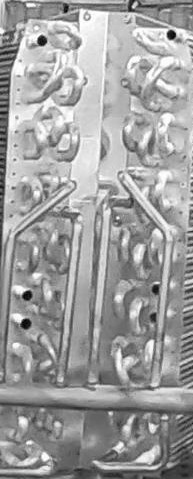

Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/75_crop.jpg


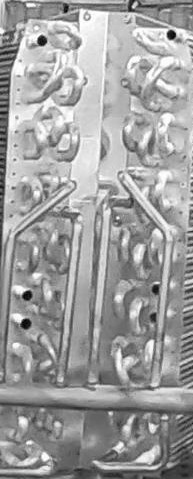

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


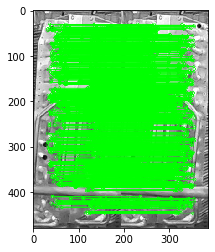

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/75_crop-75_crop
Matches Found
['75_crop-match75_crop.jpg']
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/12_crop_fittings_not_11.jpg


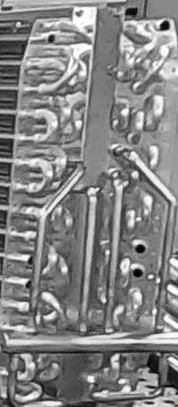

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


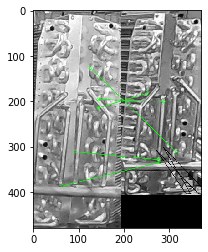

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/75_crop-12_crop_fittings_not_11
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg']
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/45_11_crop_fittings.jpg


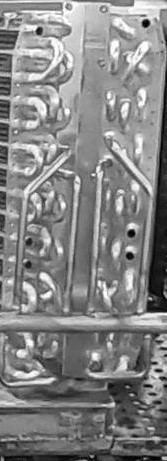

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


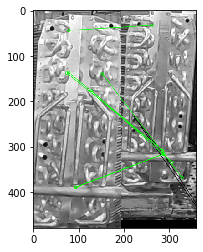

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/75_crop-45_11_crop_fittings
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg', '75_crop-match45_11_crop_fittings.jpg']
/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/12_crop_fittings_not_11.jpg


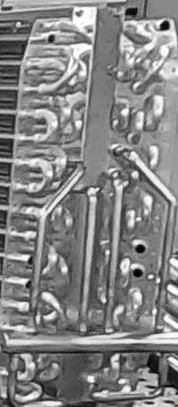

Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/75_crop.jpg


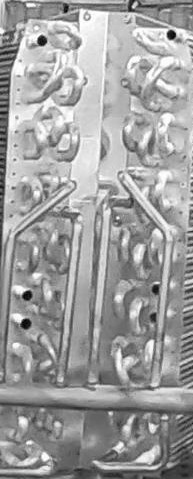

Created orb descriptor
Found Keypoints & Descriptors
Not Enough matches are found - 710


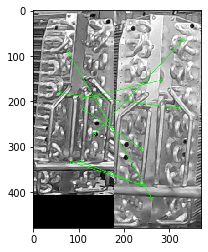

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/12_crop_fittings_not_11-75_crop
No Matches Found
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/12_crop_fittings_not_11.jpg


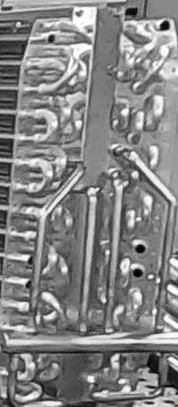

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


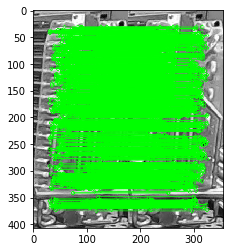

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/12_crop_fittings_not_11-12_crop_fittings_not_11
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg', '75_crop-match45_11_crop_fittings.jpg', '12_crop_fittings_not_11-match12_crop_fittings_not_11.jpg']
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/45_11_crop_fittings.jpg


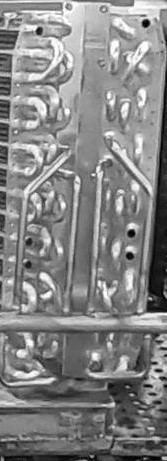

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


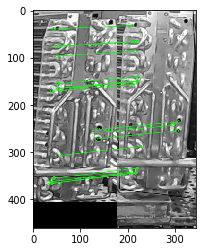

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/12_crop_fittings_not_11-45_11_crop_fittings
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg', '75_crop-match45_11_crop_fittings.jpg', '12_crop_fittings_not_11-match12_crop_fittings_not_11.jpg', '12_crop_fittings_not_11-match45_11_crop_fittings.jpg']
/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/45_11_crop_fittings.jpg


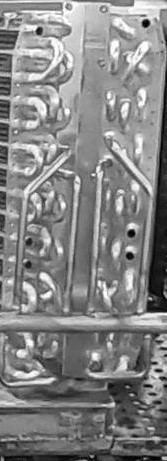

Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/75_crop.jpg


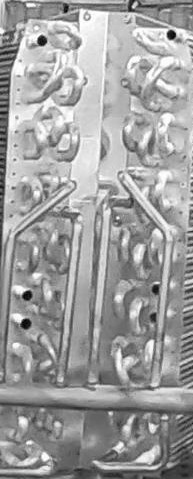

Created orb descriptor
Found Keypoints & Descriptors
Not Enough matches are found - 1010


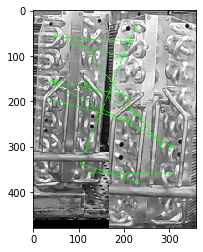

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/45_11_crop_fittings-75_crop
No Matches Found
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/12_crop_fittings_not_11.jpg


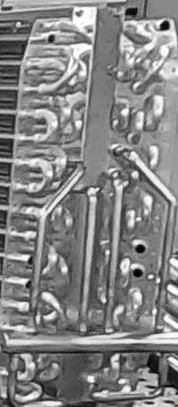

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


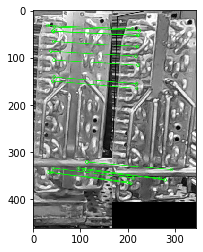

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/45_11_crop_fittings-12_crop_fittings_not_11
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg', '75_crop-match45_11_crop_fittings.jpg', '12_crop_fittings_not_11-match12_crop_fittings_not_11.jpg', '12_crop_fittings_not_11-match45_11_crop_fittings.jpg', '45_11_crop_fittings-match12_crop_fittings_not_11.jpg']
Read Files /content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/45_11_crop_fittings.jpg


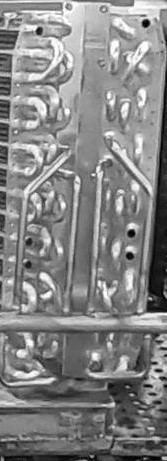

Created orb descriptor
Found Keypoints & Descriptors
The Same One!!


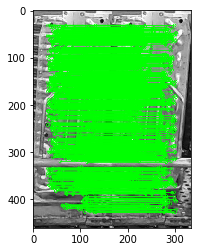

/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/45_11_crop_fittings-45_11_crop_fittings
Matches Found
['75_crop-match75_crop.jpg', '75_crop-match12_crop_fittings_not_11.jpg', '75_crop-match45_11_crop_fittings.jpg', '12_crop_fittings_not_11-match12_crop_fittings_not_11.jpg', '12_crop_fittings_not_11-match45_11_crop_fittings.jpg', '45_11_crop_fittings-match12_crop_fittings_not_11.jpg', '45_11_crop_fittings-match45_11_crop_fittings.jpg']


In [0]:
# getDescriptorForFp1(inImgPath,listofTestImages,testPath,resultPath)

# resultPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/UniqueResults/'
# AssembledCoilPath='/content/drive/My Drive/Lennox/CroppedAssembledImageswithFittings/CropFittings/'

# if not os.path.exists(resultPath):
#   os.makedirs(resultPath)

# listofAssmblImages=os.listdir(AssembledCoilPath)
# print(listofAssmblImages)

# for coilfile in listofAssmblImages:
#   # img1 = cv2.imread(AssembledCoilPath+ coilfile,0) # trainImage
#   print(AssembledCoilPath+coilfile)
#   # cv2_imshow(img1)
#   inputPath=AssembledCoilPath+coilfile
#   getDescriptorForFp1(inputPath,listofAssmblImages,AssembledCoilPath,resultPath)



In [0]:
def getORBdescriptors():
  

In [0]:
def getDescriptorForFp1(inImgPath,listofTestImages,testPath,resultPath):

  img1 = cv2.imread(inImgPath,0) # trainImage
  cv2_imshow(img1)
  
  for tstimage in listofTestImages:

    img2 = cv2.imread(testPath + tstimage,0) # trainImage
    
    print("Read Files",testPath + tstimage)

    cv2_imshow(img2)

    MIN_MATCH_COUNT = 10

    #Create ORB Object and BF Object (using Hamming)

    #orb = cv2.ORB_create()
    orb = cv2.ORB_create(nfeatures=2500)

    print("Created orb descriptor")

    #Find Keypoints and Descriptors

    kpts1, descs1 = orb.detectAndCompute(img1, None)

    kpts2, descs2 = orb.detectAndCompute(img2, None)

    print ("Found Keypoints & Descriptors")

    #match descriptors and sort them in order of their distance

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    matches = bf.knnMatch(descs1, trainDescriptors = descs2, k=2)
    good = []

    good_without_list = []

    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
            good_without_list.append(m)

    if len(good) > MIN_MATCH_COUNT:

        src_pts = np.float32([kpts1[m.queryIdx].pt for m in good_without_list]).reshape(-1,1,2)
        dst_pts = np.float32([kpts2[m.trainIdx].pt for m in good_without_list]).reshape(-1,1,2)
      
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
      
        h,w = img1.shape[:2]
        pts = np.float32([[0,0], [0,h-1], [w-1, h-1], [w-1,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
      
        img2 = cv2.polylines(img2, [np.int32(dst)], True, (0,0,255),1 , cv2.LINE_AA)
        print ("The Same One!!")
    else:
        print ("Not Enough matches are found - %d%d" % (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

    img3 = cv2.drawMatches(img1,kpts1,img2,kpts2,good_without_list,None,**draw_params)

    plt.imshow(img3, 'gray'),plt.show()
    
    # '/content/drive/My Drive/Lennox/Results_fp2/NoMatch'
    print(resultPath+inImgPath.split(".")[0].split("/")[-1]+'-'+tstimage.split(".")[0])
    if(matchesMask != None):
      print('Matches Found')
      if not os.path.exists(resultPath+'Match'):
        os.makedirs(resultPath+'Match')
      cv2.imwrite(resultPath+'Match/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'match'+tstimage.split(".")[0]+'.jpg',img3)
      print(os.listdir(resultPath+'Match/'))  
    else:
      print('No Matches Found')
      if not os.path.exists(resultPath+'Match'):
        os.makedirs(resultPath+'Match')
      cv2.imwrite(resultPath+'NoMatch/'+inImgPath.split(".")[0].split("/")[-1]+'-'+'Nomatch'+tstimage.split(".")[0]+'.jpg',img3) 
